In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv('data/Sleep_Efficiency.csv')
data = data.drop(columns=["ID", "Bedtime", "Wakeup time"])

# Change Gender and Smoking status to true/false
data = pd.get_dummies(data, columns=['Gender', 'Smoking status'], drop_first=True)

data.head(n=15)

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male,Smoking status_Yes
0,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,False,True
1,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,True,True
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,False,False
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,False,True
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,True,False
5,36,7.5,0.90,23,60,17,0.0,NaN,0.0,1.0,False,False
6,27,6.0,0.54,28,25,47,2.0,50.0,0.0,1.0,False,True
7,53,10.0,0.90,28,52,20,0.0,50.0,0.0,3.0,True,True
8,41,6.0,0.79,28,55,17,3.0,50.0,0.0,1.0,False,False
9,11,9.0,0.55,18,37,45,4.0,0.0,0.0,0.0,False,False


In [35]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Sleep duration          452 non-null    float64
 2   Sleep efficiency        452 non-null    float64
 3   REM sleep percentage    452 non-null    int64  
 4   Deep sleep percentage   452 non-null    int64  
 5   Light sleep percentage  452 non-null    int64  
 6   Awakenings              432 non-null    float64
 7   Caffeine consumption    427 non-null    float64
 8   Alcohol consumption     438 non-null    float64
 9   Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 35.4 KB


Age                        0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Exercise frequency         6
dtype: int64

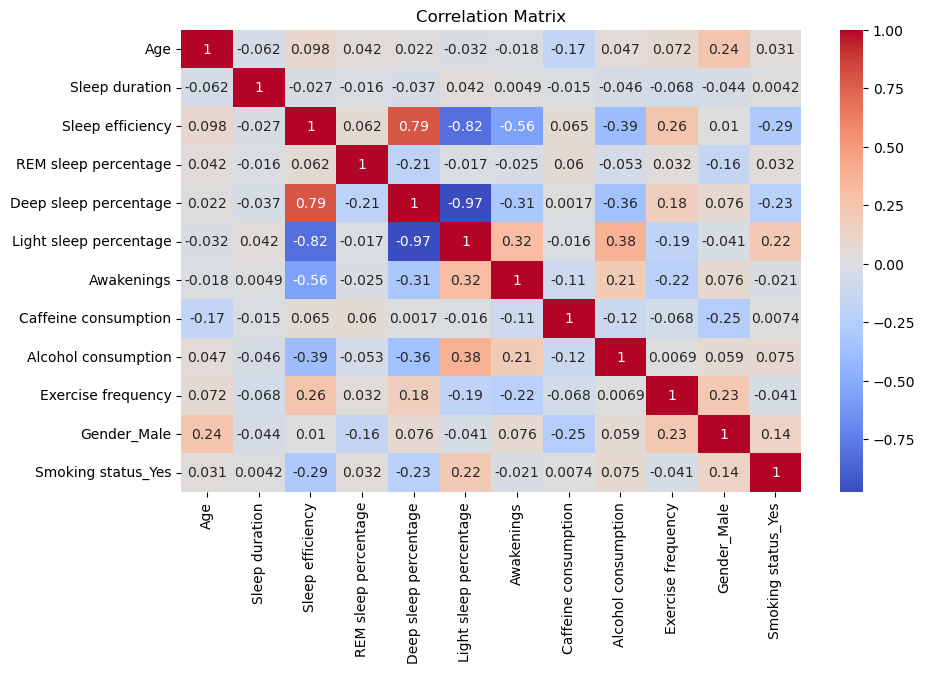

In [50]:
data_copy = data.copy()
data_copy.dropna()
correlation_matrix = data_copy.corr()


plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

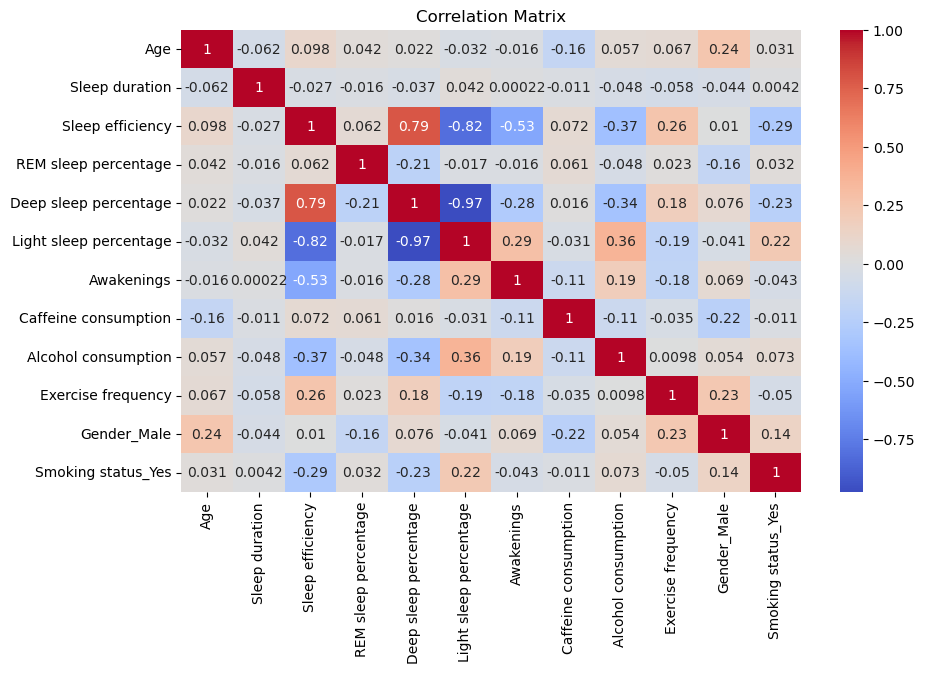

In [63]:
correlation_matrix = data.corr()


plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Categories for total sleep hours
data['Sleep_Group'] = pd.cut(data['Total Sleep Hours'], bins=3, labels=['Low', 'Medium', 'High'])


sns.scatterplot(x='Total Sleep Hours', y='Productivity Score', hue='Sleep_Group', data=data)
plt.title('Productivity Score per Total Sleep Hours')
plt.show()

# 1. Define the OLS model
#    Formula notation: Dependent ~ Independent
data = data.rename(columns={'Productivity Score': 'ProductivityScore'})
model = ols('ProductivityScore ~ C(Sleep_Group)', data=data).fit()

# 2. Create the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)  # typ=2 is common for balanced data
print(anova_table)
data = data.rename(columns={'ProductivityScore': 'Productivity Score'})